In [1]:
from IPython.display import Latex
# Latex(r"""\begin{eqnarray} \large 
# Z_{n+1} = Z_{n}^(-e^(Z_{n}^p)^(e^(Z_{n}^p)^(-e^(Z_{n}^p)^(e^(Z_{n}^p)^(-e^(Z_{n}^p))))))
# \end{eqnarray}""")

# Parameterized machine learning algo: 
## tanh(Z) = (a  exp(Z) - b exp(-Z)) / (c exp(Z) + d exp(-Z))
### with parameters a,b,c,d s.t. ad - bc = 1

    Sequential iteration of difference equation:
    Z = 
    

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def rnd_lambda(s=1):
    """ random parameters s.t. a*d - b*c = 1 """
    b = np.random.random()
    c = np.random.random()
    ad = b*c + 1
    a = np.random.random()
    d = ad / a
    lamb0 = {'a': a, 'b': b, 'c': c, 'd': d}
    lamb0 = np.array([a, b, c, d]) * s
    
    return lamb0

In [4]:
def tanh_lmbd(Z, p, Z0=None, ET=None):
    """ Z = starfish_ish(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    Zp = np.exp(Z)
    Zm = np.exp(-Z)
    return (p[0] * Zp - p[1] * Zm) / (p[2] * Zp + p[3] * Zm)

In [5]:
def plane_gradient(X):
    """ DX, DY = plane_gradient(X) 
    Args:
        X:          matrix
    Returns:
        DX:         gradient in X direction
        DY:         gradient in Y direction
    """
    n_rows = X.shape[0]
    n_cols = X.shape[1]
    DX = np.zeros(X.shape)
    DY = np.zeros(X.shape)
    for r in range(0, n_rows):
        xr = X[r, :]
        for c in range(0, n_cols - 1):
            DX[r,c] = xr[c+1] - xr[c]
            
    for c in range(0, n_cols):
        xc = X[:, c]
        for r in range(0, n_rows -1):
            DY[r, c] = xc[r+1] - xc[r]
        
    return DX, DY

def grad_Im(X):
    """
    Args:
        X:               matrix
    Returns:
        Gradient_Image:  positive matrix representation of the X-Y gradient of X
    """
    DX, DY = plane_gradient(X)
    return gu.graphic_norm(DX + DY * 1j)

def grad_pct(X):
    """ percentage of X s.t gradient > 0 """
    I = grad_Im(X)
        
    return (I > 0).sum() / (X.shape[0] * X.shape[1])

def get_half_n_half(X):
    """ box counting, fractal dimension submatrix shortcut """
    
    x_rows = X.shape[0]
    x_cols = X.shape[1]
    x_numel = x_rows * x_cols
    
    y_rows = np.int(np.ceil(x_rows / 2))
    y_cols = np.int(np.ceil(x_cols / 2))
    y_numel = y_rows * y_cols
    Y = np.zeros([y_rows, y_cols])
    
    for r in range(0, y_rows):
        for c in range(0, y_cols):
            Y[r,c] = X[2*r, 2*c]
            
    return Y, y_numel, x_numel


def get_fractal_dim(X):
    """ estimate fractal dimension by box counting """
    Y, y_numel, x_numel = get_half_n_half(X)
    X_pct = grad_pct(X) + 1
    Y_pct = grad_pct(Y) + 1
    
    return X_pct / Y_pct

In [6]:
X = np.random.random([5,5])
X[X < 0.5] = 0
Y, y_numel, x_numel = get_half_n_half(X)
X_pct = grad_pct(X)
Y_pct = grad_pct(Y)

print(X_pct, Y_pct)
print('y_numel', y_numel, '\nx_numel', x_numel)
print(X_pct / Y_pct)
# print(Y)
# print(X)
print(get_fractal_dim(X))

0.88 0.6666666666666666
y_numel 9 
x_numel 25
1.32
1.1280000000000001


[0.4523232  0.5507815  0.75367311 9.76096118] 
 4.287211894989014 	 total time
Fractal Dimensionn =  0.0001500000000000945


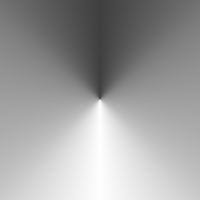

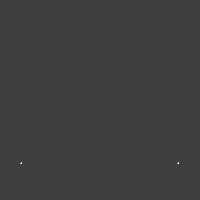

In [7]:
#                                        -- machine with 8 cores --
P0 = [ 1.68458678,  1.72346312,  0.53931956,  2.92623535]
P1 = [ 1.99808082,  0.68298986,  0.80686446,  2.27772581] 
P2 = [ 1.97243201,  1.32849475,  0.24972699,  2.19615225]
P3 = [ 1.36537498,  1.02648965,  0.60966423,  3.38794403]

p_scale = 2
P = rnd_lambda(p_scale)
# P = np.array(P3)

N = 200
par_set = {'n_rows': N, 'n_cols': N}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = np.pi / 2
par_set['zoom'] = 1/2

par_set['it_max'] = 16
par_set['max_d'] = 12 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(tanh_lmbd, (P))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(P, '\n', tt, '\t total time')

Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('Fractal Dimensionn = ', get_fractal_dim(ETn) - 1)

ZrN = ncp.range_norm(Zr, lo=0.25, hi=1.0)
display(ncp.gray_mat(ZrN))

ZrN = ncp.range_norm(gu.grad_Im(ETn), lo=0.25, hi=1.0)
R = ncp.gray_mat(ZrN)

display(R)

[1.97243201 1.32849475 0.24972699 2.19615225] 
 70.47121977806091 	 total time
converstion time =	 1.586843729019165
coloring time =	 3.6288599967956543


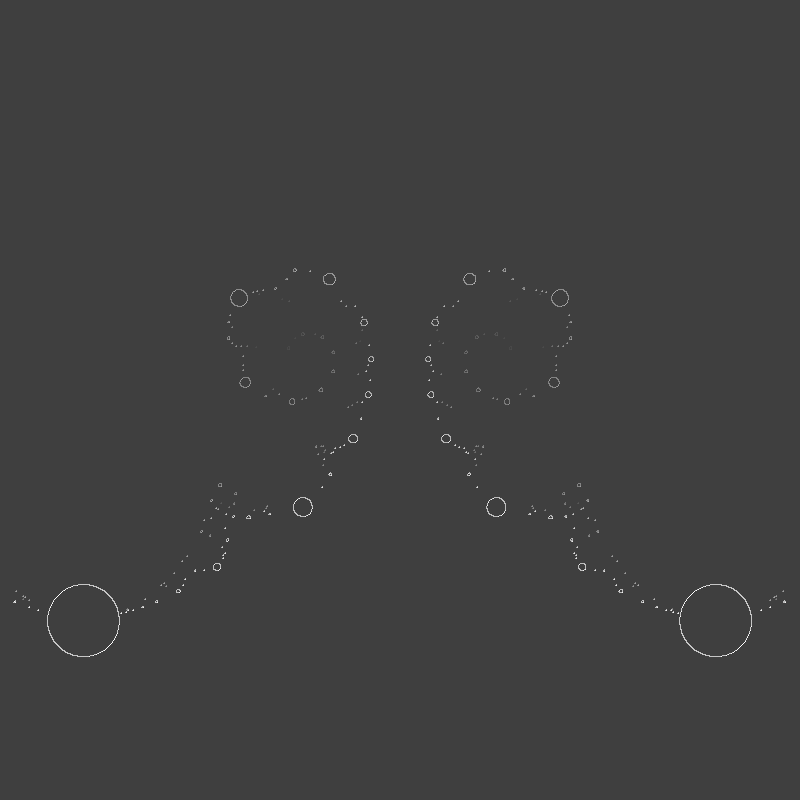

In [8]:
#                                        -- machine with 4 cores --
p_scale = 2
# P = rnd_lambda(p_scale)
P = np.array([1.97243201,  1.32849475,  0.24972699,  2.19615225])

N = 800
par_set = {'n_rows': N, 'n_cols': N}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = np.pi / 2
par_set['zoom'] = 1/2

par_set['it_max'] = 16
par_set['max_d'] = 12 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(tanh_lmbd, (P))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(P, '\n', tt, '\t total time')

t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

t0 = time.time()
# ZrN = ncp.range_norm(Zr, lo=0.25, hi=1.0)
# R = ncp.gray_mat(ZrN)

ZrN = ncp.range_norm(gu.grad_Im(ETn), lo=0.25, hi=1.0)
R = ncp.gray_mat(ZrN)

print('coloring time =\t',time.time() - t0)
display(R)

In [9]:
# def grad_pct(X):
#     """ percentage of X s.t gradient > 0 """
#     I = gu.grad_Im(X)
#     nz = (I == 0).sum()
#     if nz > 0:
#         grad_pct = (I > 0).sum() / nz
#     else:
#         grad_pct = 1
#     return grad_pct

In [10]:
I = gu.grad_Im(ETn)
nz = (I == 0).sum()
nb = (I > 0).sum()

print(nz, nb, ETn.shape[0] * ETn.shape[1], nz + nb) 



637849 2151 640000 640000


In [11]:
P0 = [ 1.68458678,  1.72346312,  0.53931956,  2.92623535]
P1 = [ 1.99808082,  0.68298986,  0.80686446,  2.27772581] 
P2 = [ 1.97243201,  1.32849475,  0.24972699,  2.19615225]
P3 = [ 1.36537498,  1.02648965,  0.60966423,  3.38794403]

coloring time:	 7.2474751472473145


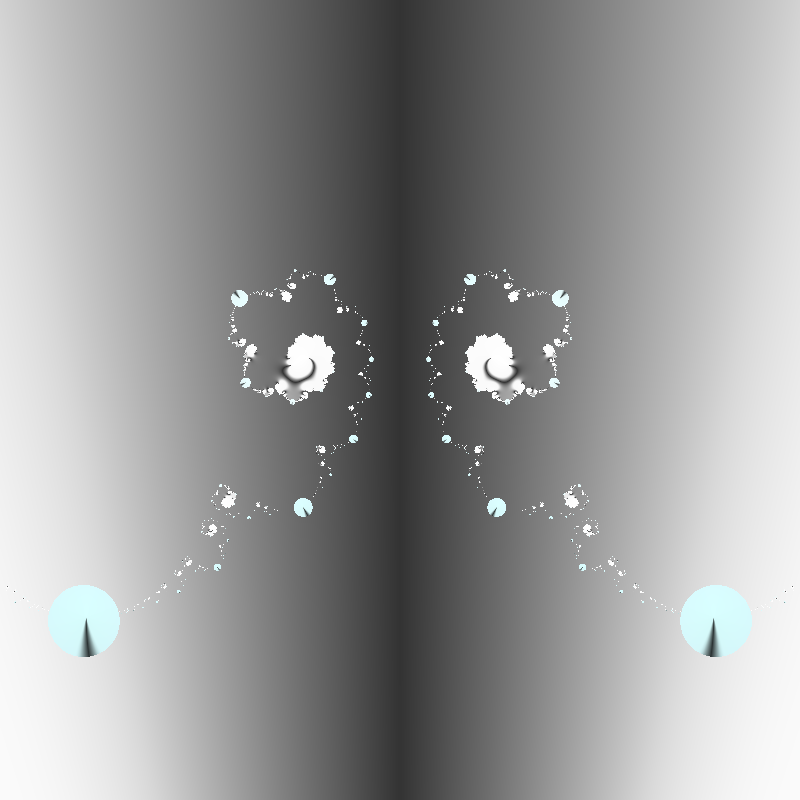

In [12]:
H = ncp.range_norm(1 - Zd, lo=0.5, hi=1.0)
S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.15)
V = ncp.range_norm(Zr, lo=0.2, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 7.5052080154418945


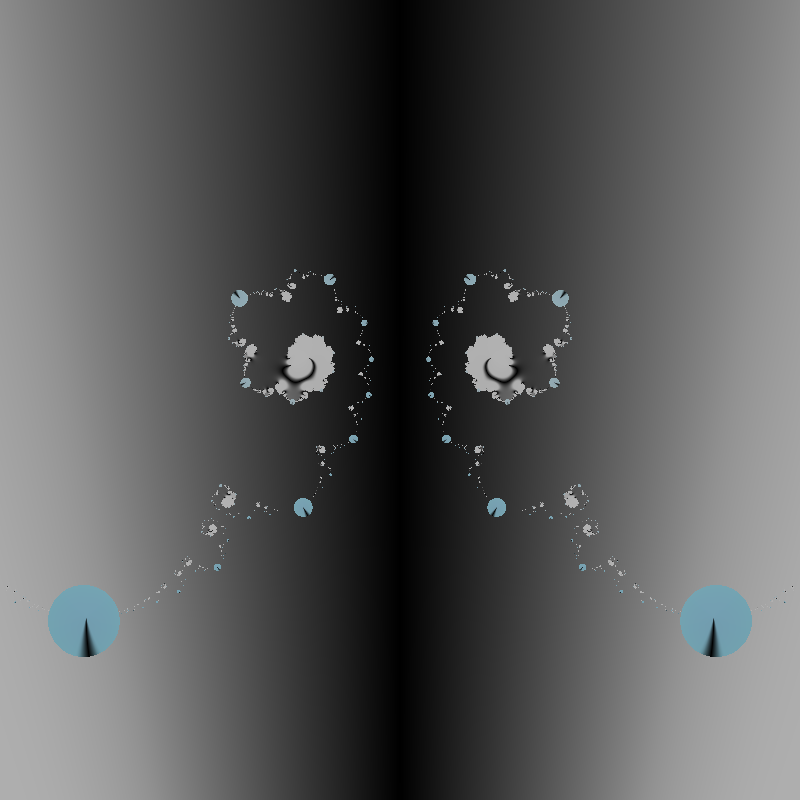

In [13]:
H = ncp.range_norm(Zd, lo=0.05, hi=0.55)
S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.35)
V = ncp.range_norm(Zr, lo=0.0, hi=0.7)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

In [15]:
#                                        smaller for analysis
par_set = {'n_rows': 200, 'n_cols': 200}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 16
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

# list_tuple = [(starfish_ish, (-0.040431211565+0.388620268274j))]
list_tuple = [(tanh_lmbd, (P))]
t0 = time.time()
ET_sm, Z_sm, Z0_zm = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

4.391478061676025 	 total time


ET =	 1


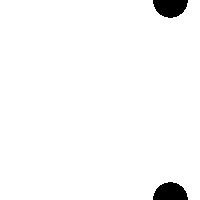

ET =	 2


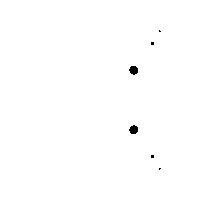

ET =	 3


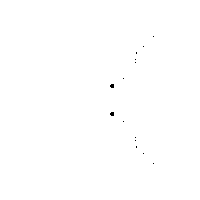

ET =	 4


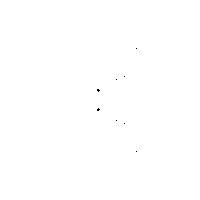

ET =	 5


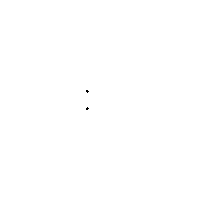

ET =	 6


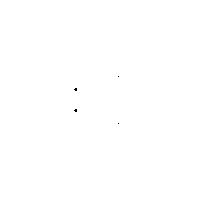

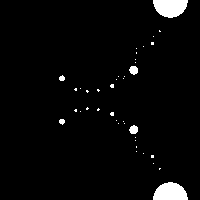

In [16]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [17]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 974
2 148
3 42
4 18
5 12
6 16
7 56
8 116
9 52
10 26
11 10
12 8
13 6
14 8
15 10
16 8

How many never escaped:
> 38490


In [21]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0_zm[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('One Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

One Unescaped Vector:
	V =  2.26 135.0 degrees

    38490 total unescaped points

   points near V       (plane units)
    15466 within V/ 1  (2.263)
     3964 within V/ 2  (1.131)
     1774 within V/ 3  (0.754)
     1009 within V/ 4  (0.566)
      648 within V/ 5  (0.453)
      459 within V/ 6  (0.377)
      339 within V/ 7  (0.323)
      261 within V/ 8  (0.283)
      208 within V/ 9  (0.251)
      170 within V/10  (0.226)
      140 within V/11  (0.206)
